<a href="https://colab.research.google.com/github/Amjadkp/Deep_Learning_Lab/blob/main/MDS_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

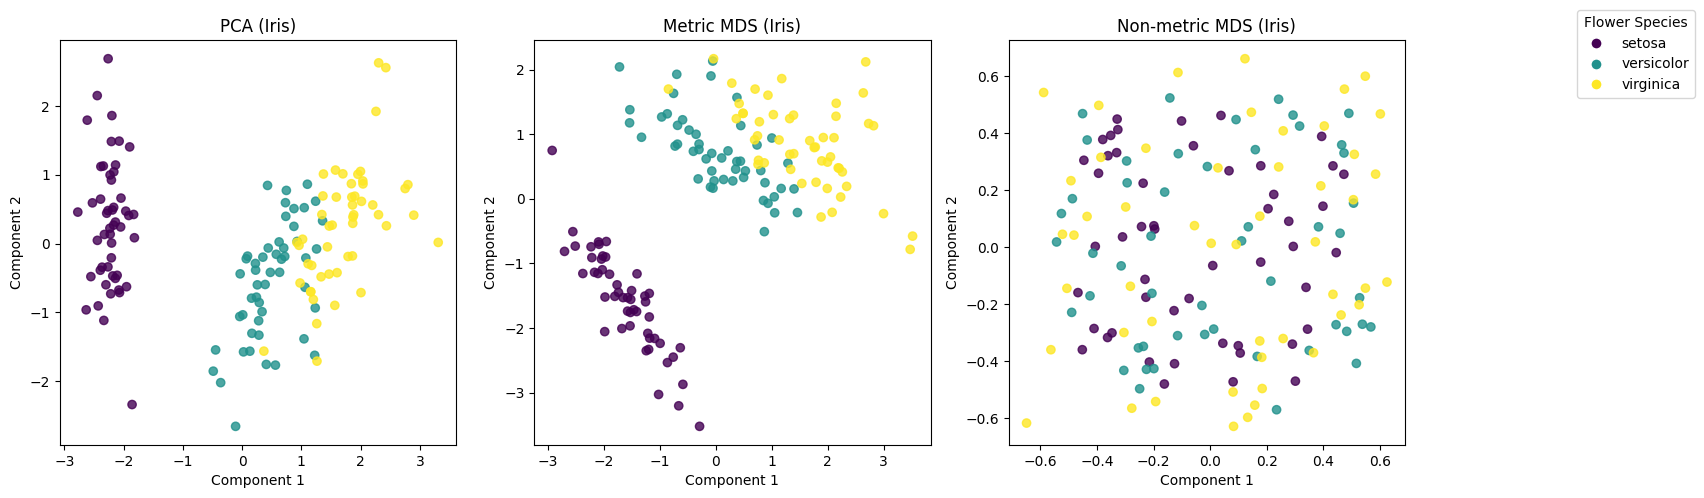

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler # Added for best practice

# Load the Iris dataset (4 features, 3 classes)
iris = load_iris()
X, y = iris.data, iris.target

# Standardize the data (Good practice for distance-based methods like PCA/MDS)
X_scaled = StandardScaler().fit_transform(X)

# --- PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- Metric MDS ---
# Metric=True: Tries to preserve the actual distances (Euclidean)
mds_metric = MDS(n_components=2, metric=True, random_state=42, normalized_stress='auto')
X_mds_metric = mds_metric.fit_transform(X_scaled)

# --- Non-metric MDS ---
# Metric=False: Tries to preserve the rank ordering of distances (non-linear)
mds_nonmetric = MDS(n_components=2, metric=False, random_state=42, normalized_stress='auto')
X_mds_nonmetric = mds_nonmetric.fit_transform(X_scaled)

# --- Plot side by side ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ["PCA (Iris)", "Metric MDS (Iris)", "Non-metric MDS (Iris)"]
embeddings = [X_pca, X_mds_metric, X_mds_nonmetric]

for ax, emb, title in zip(axes, embeddings, titles):
    scatter = ax.scatter(emb[:, 0], emb[:, 1], c=y, cmap="viridis", alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')

# Use Iris target names for the legend
class_names = iris.target_names
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=class_names[i],
                             markerfacecolor=scatter.to_rgba(i), markersize=8)
                  for i in range(len(class_names))]

fig.legend(handles=legend_handles, title="Flower Species", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout(rect=[0, 0, 0.95, 1]) # Adjust layout to make room for the legend
plt.show()